# Decision Tree

# 3個算法的主要區別在於度量信息方法、選擇節點特徵還有分支數量的不同。
#### ID3，採用熵（entropy）來度量信息不確定度，選擇“​​信息增益”最大的作為節點特徵，它是多叉樹，即一個節點可以有多個分支。
#### CART，採用基尼指數（Gini index）來度量信息不純度，選擇基尼指數最小的作為節點特徵，它是二叉樹，即一個節點只分兩支。
#### C4.5，同樣採用熵（entropy）來度量信息不確定度，選擇“​​信息增益比”最大的作為節點特徵，同樣是多叉樹，即一個節點可以有多個分支。

#### http://greenhornfinancefootnote.blogspot.com/2011/09/what-is-gini-coefficient.html

# ID3

In [1]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data

In [2]:
data = pd.read_csv('c:/Rdata/p6.4.csv')  # load data set
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,warm,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,warm,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,warm,normal,False,yes


In [3]:
target = data['play']
target.columns = ['play']


In [4]:
# one-hot encoding
# performing one hot encoding on the feature (data) columns stored in features_dataframe

In [5]:
features_dataframe = data.loc[:, data.columns != 'play']
features_dataframe = pd.get_dummies(features_dataframe) 
features_dataframe.columns

Index(['windy', 'outlook_overcast', 'outlook_rainy', 'outlook_sunny',
       'temp_cool', 'temp_hot', 'temp_warm', 'humidity_high',
       'humidity_normal'],
      dtype='object')

In [6]:
features_dataframe

,windy,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_warm,humidity_high,humidity_normal
0,False,0,0,1,0,1,0,1,0
1,True,0,0,1,0,1,0,1,0
2,False,1,0,0,0,1,0,1,0
3,False,0,1,0,0,0,1,1,0
4,False,0,1,0,1,0,0,0,1
5,True,0,1,0,1,0,0,0,1
6,True,1,0,0,1,0,0,0,1
7,False,0,0,1,0,0,1,1,0
8,False,0,0,1,1,0,0,0,1
9,False,0,1,0,0,0,1,0,1


In [7]:
# converts target column stored in target 
# which essentially has binary class labels ("yes" and "no") to integer, because sklearn won't work with categories 

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(target.values)

k = le.transform(target.values)
k

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [9]:
from sklearn import tree
from os import system

### 信息增益(Information Gain)：它度量了X在知道Y以后不确定性减少程度，这个度量我们在信息论中称为互信息，记为I(X,Y)。在决策树ID3算法中叫做信息增益。 


In [10]:
dtree = tree.DecisionTreeClassifier(criterion = "entropy")
dtree = dtree.fit(features_dataframe, k)

print(tree.export_graphviz(dtree, None))
#dotfile = open("id3.dot", 'w')
#tree.export_graphviz(dtree, out_file = dotfile, feature_names = features_dataframe.columns)
#dotfile.close()

digraph Tree {
node [shape=box] ;
0 [label="X[1] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]"] ;
1 [label="X[8] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[2] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]"] ;
1 -> 2 ;
3 [label="entropy = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
2 -> 3 ;
4 [label="X[0] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]"] ;
2 -> 4 ;
5 [label="entropy = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
4 -> 5 ;
6 [label="entropy = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
4 -> 6 ;
7 [label="X[0] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]"] ;
1 -> 7 ;
8 [label="entropy = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
7 -> 8 ;
9 [label="X[6] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]"] ;
7 -> 9 ;
10 [label="entropy = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
9 -> 10 ;
11 [label="entropy = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
9 -> 11 ;
12 [label="entropy = 0.0\nsamples = 4\nva

# 繪圖 Graphviz Online

### https://dreampuf.github.io/GraphvizOnline/

In [11]:
prediction = dtree.predict(features_dataframe)

print("The prediction accuracy is: ",dtree.score(features_dataframe,k)*100,"%") 

The prediction accuracy is:  100.0 %


# 繪圖 Graphviz on Jupyter NB

In [11]:
!pip install graphviz

In [12]:
from graphviz import Digraph

In [13]:
# http://www.graphviz.org/  下载windows版本的运行安装即可
# download  stable_windows_10_cmake_Release_x64_graphviz-install-2.46.1-win64.exe
# 安裝時 需要選擇將 PATH 加入此程式

In [14]:
!pip install pydotplus
!pip install IPython

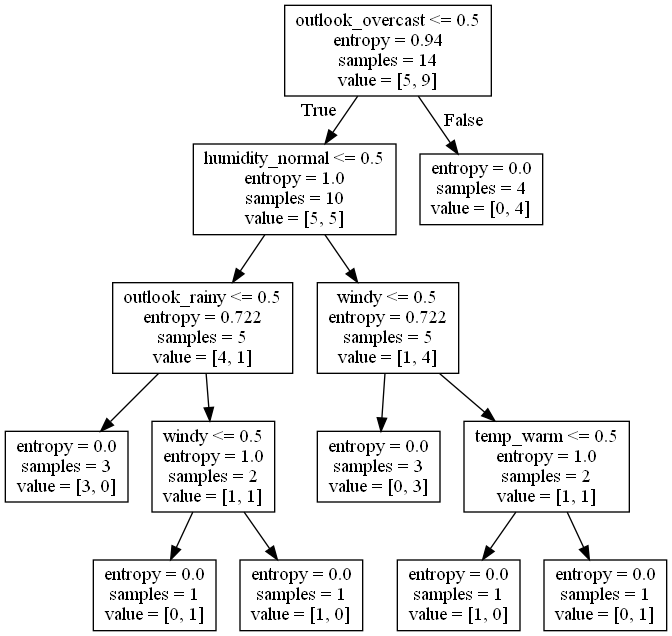

In [15]:
import pydotplus # To create our Decision Tree Graph
from IPython.display import Image  # To Display a image of our graph
#Create Dot Data
#dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(one_hot_data.columns.values), 
                              #  class_names=['Not_Play', 'Play'], rounded=True, filled=True) #Gini decides which attribute/feature should be placed at the root node, which features will act as internal nodes or leaf nodes

dot_data = tree.export_graphviz(dtree, out_file = None, feature_names = features_dataframe.columns)
#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

# CART

In [16]:
dtree = tree.DecisionTreeClassifier(criterion = "gini")
dtree = dtree.fit(features_dataframe, k)

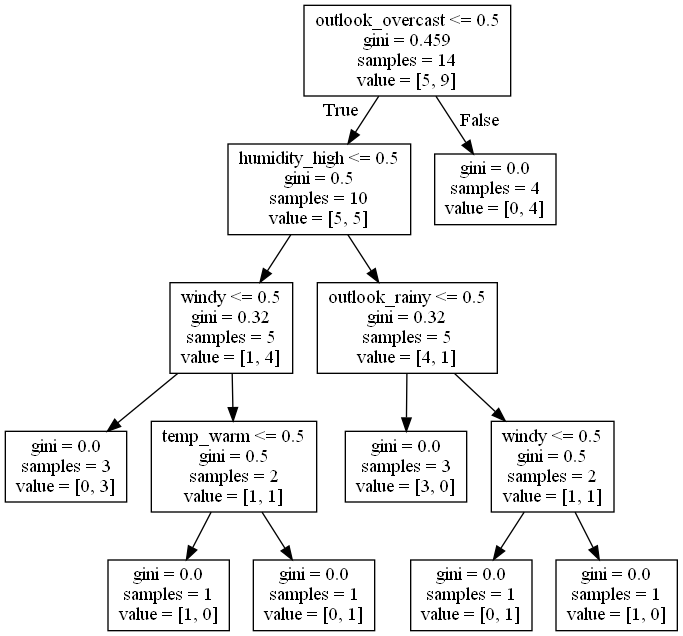

In [17]:
import pydotplus # To create our Decision Tree Graph
from IPython.display import Image  # To Display a image of our graph
#Create Dot Data
#dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(one_hot_data.columns.values), 
                              #  class_names=['Not_Play', 'Play'], rounded=True, filled=True) #Gini decides which attribute/feature should be placed at the root node, which features will act as internal nodes or leaf nodes

dot_data = tree.export_graphviz(dtree, out_file = None, feature_names = features_dataframe.columns)
#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

# C4.5

### C4.5主要是在ID3的基礎上改進，ID3選擇（屬性）樹節點是選擇資訊增益值最大的屬性作為節點。
### 而C4.5引入了新概念“資訊增益率”,C4.5是選擇資訊增益率最大的屬性作為樹節點。